# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [59]:
#Importamos todas las librerias necesarias para resolver este lab

%matplotlib inline
import pandas as pd
import numpy as np
import re

import matplotlib.pyplot as plt

from scipy.stats import f_oneway, f

import statsmodels.api as sm
from statsmodels.formula.api import ols 

import warnings
warnings.simplefilter('ignore')

import seaborn as sns

from scipy.stats import norm
import scipy.stats as stats

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
# Your code here. 
#En la varianle X vamos a insertar los valores de las edades y en la Y insertaremos las Tardies
student_data = pd.DataFrame({'X': [17, 51, 27, 21, 36, 48, 19, 26, 54, 30], 'Y': [10, 1, 5, 9, 4, 2, 9, 6, 0, 3]})

Draw a dispersion diagram (scatter plot) for the data.

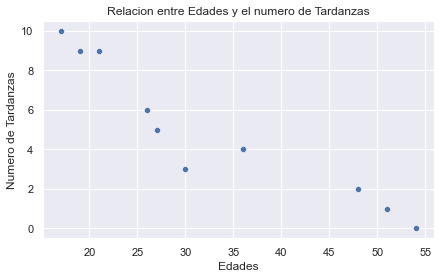

In [23]:
# Your code here.
fig = plt.gcf()
fig.set_size_inches(7, 4)

sns.scatterplot(data = student_data, x = "X", y = "Y")

plt.title('Relacion entre Edades y el numero de Tardanzas', fontsize=12)
plt.xlabel('Edades', fontsize=12);
plt.ylabel('Numero de Tardanzas', fontsize=12);

plt.show();

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [2]:
# Your response here. 
#Se aprecia una relacion negativa entre las variables, a menor edad mayor numero de tardanzas.

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [12]:
#Calculamos el coeficiente de correlacion de las variables
corr = student_data.corr()
corr

,X,Y
X,1.000000,-0.939163
Y,-0.939163,1.000000


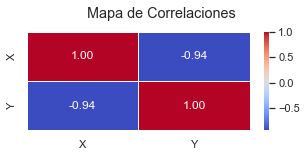

In [30]:
# Your response here.
sns.set() #heatmap de las correlaciones con seaborn

fig, ax = plt.subplots(figsize=(5, 2))
sns.heatmap(round(corr, 2), annot=True, ax=ax, cmap='coolwarm',
            fmt='.2f', linewidths=0.5)
fig.subplots_adjust(top=0.81)
fig.suptitle('Mapa de Correlaciones');

In [14]:
#Calculamos la covarianza
student_data.cov()

,X,Y
X,187.655556,-45.566667
Y,-45.566667,12.544444


In [ ]:
"""El coeficiente de correlacion entre las dos variables es de -0.94, indicando que existe una relacion muy alta entre ambas,
a menor edad implica mayor numero de tardanzas. Por otro lado la covarianza indica una relacion lineal negativa entre las dos"""


Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [15]:
# Your response here.
#vamos a utilizar una regresion lineal simple entre las variables de tardanzas en funcion de edades
x = student_data[['X']] #Edades como variable independiente
y = student_data[['Y']] #Tardanza como variable dependiente

X = sm.add_constant(x)

Y = y

modelo = sm.OLS(Y,X).fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     59.81
Date:                Mon, 09 May 2022   Prob (F-statistic):           5.57e-05
Time:                        14:53:46   Log-Likelihood:                -15.622
No. Observations:                  10   AIC:                             35.24
Df Residuals:                       8   BIC:                             35.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.8888      1.111     11.605      0.0

Plot your regression model on your scatter plot.

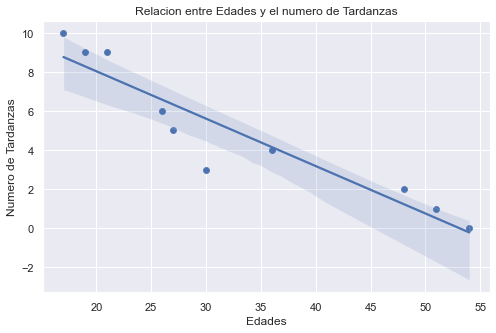

In [46]:
# Your code here.
fig = plt.gcf()
fig.set_size_inches(8, 5)

sns.scatterplot(data = student_data, x = "X", y = "Y")
sns.regplot(x="X", y="Y", data=student_data)

plt.title('Relacion entre Edades y el numero de Tardanzas', fontsize=12)
plt.xlabel('Edades', fontsize=12);
plt.ylabel('Numero de Tardanzas', fontsize=12);

plt.show();

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [3]:
# Your response here. 
"""Se concluye que la edad es un buen predictor de el numero de tardanzas, y se confirma nuestra hipotesis de que a menor
edad mayor numero de tardanzas, lo cual implica que los jovenes son menos puntuales en promedio que las personas
de edades mayores. Afirmamos nuestra hipotesis con un nivel de explicacion de un 88.2%, el cual se puede apreciar
en nuestro coefieciente de R2"""

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [39]:
# Import any libraries you may need & the data
vehicles = pd.read_csv('vehicles.csv')
vehicles.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


In [40]:
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35952 entries, 0 to 35951
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Make                     35952 non-null  object 
 1   Model                    35952 non-null  object 
 2   Year                     35952 non-null  int64  
 3   Engine Displacement      35952 non-null  float64
 4   Cylinders                35952 non-null  float64
 5   Transmission             35952 non-null  object 
 6   Drivetrain               35952 non-null  object 
 7   Vehicle Class            35952 non-null  object 
 8   Fuel Type                35952 non-null  object 
 9   Fuel Barrels/Year        35952 non-null  float64
 10  City MPG                 35952 non-null  int64  
 11  Highway MPG              35952 non-null  int64  
 12  Combined MPG             35952 non-null  int64  
 13  CO2 Emission Grams/Mile  35952 non-null  float64
 14  Fuel Cost/Year        

Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [41]:
#Filtramos las columnas que necesitamos
#Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year
vehicles_columns = vehicles[['Year', 'CO2 Emission Grams/Mile', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']]
vehicles_columns

,Year,CO2 Emission Grams/Mile,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year
0,1984,522.764706,4.0,19.388824,17,1950
1,1984,683.615385,6.0,25.354615,13,2550
2,1985,555.437500,4.0,20.600625,16,2100
3,1985,683.615385,6.0,25.354615,13,2550
4,1987,555.437500,6.0,20.600625,16,2550
...,...,...,...,...,...,...
35947,2013,244.000000,3.0,9.155833,36,1100
35948,2014,243.000000,3.0,9.155833,36,1100
35949,2015,244.000000,3.0,9.155833,36,1100
35950,2016,246.000000,3.0,9.155833,36,1100


In [42]:
# Your response here.
corr = vehicles_columns.corr()
corr

,Year,CO2 Emission Grams/Mile,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year
Year,1.000000,-0.222300,0.082469,-0.221084,0.204751,-0.091913
CO2 Emission Grams/Mile,-0.222300,1.000000,0.752393,0.986189,-0.926229,0.930865
Cylinders,0.082469,0.752393,1.000000,0.739517,-0.698648,0.778153
Fuel Barrels/Year,-0.221084,0.986189,0.739517,1.000000,-0.909743,0.916208
Combined MPG,0.204751,-0.926229,-0.698648,-0.909743,1.000000,-0.875185
Fuel Cost/Year,-0.091913,0.930865,0.778153,0.916208,-0.875185,1.000000


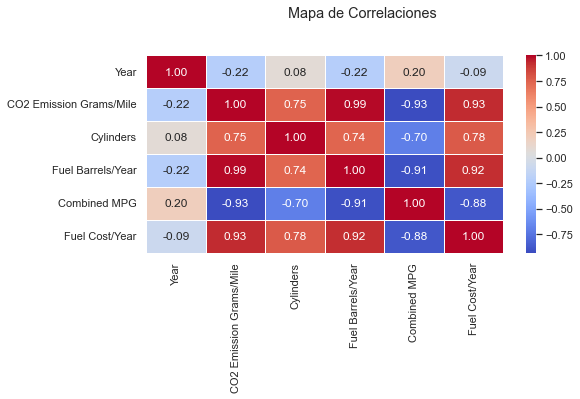

In [43]:
sns.set() #heatmap de las correlaciones con seaborn

fig, ax = plt.subplots(figsize=(8, 4))
sns.heatmap(round(corr, 2), annot=True, ax=ax, cmap='coolwarm',
            fmt='.2f', linewidths=0.5)
fig.subplots_adjust(top=0.81)
fig.suptitle('Mapa de Correlaciones');

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [44]:
# Your response here. 
x = vehicles_columns.drop(columns='CO2 Emission Grams/Mile') 
y = vehicles_columns[['CO2 Emission Grams/Mile']]

X = sm.add_constant(x)

Y = y

modelo = sm.OLS(Y,X).fit()
print(modelo.summary())

                               OLS Regression Results                              
Dep. Variable:     CO2 Emission Grams/Mile   R-squared:                       0.981
Model:                                 OLS   Adj. R-squared:                  0.981
Method:                      Least Squares   F-statistic:                 3.687e+05
Date:                     Mon, 09 May 2022   Prob (F-statistic):               0.00
Time:                             18:49:24   Log-Likelihood:            -1.5173e+05
No. Observations:                    35952   AIC:                         3.035e+05
Df Residuals:                        35946   BIC:                         3.035e+05
Df Model:                                5                                         
Covariance Type:                 nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [ ]:
# Your response here. 
Se aprecia a simple vista que el modelo es significativo segun el coeficiente de determinacion, es decir, que las variables
independientes explican en 98.1% la variable dependiente. Sin embargo se debe tener cuidado dado que el coeficiente es muy alto
y puede haber multicolinealidad entre las variables explicativas. En primer momento se debe ver la correlacion entre 
las mismas, y asi eliminar algunas.

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [61]:
# Your code here. 
invited_attended = pd.DataFrame({'invited': [1, 3, 4, 6, 8, 9, 11, 14], 'attended': [1, 2, 4, 4, 5, 7, 8, 13]})
invited_attended

,invited,attended
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8
7,14,13


In [62]:
invited_attended.shape

(8, 2)

In [63]:
corr = invited_attended.corr()
corr

,invited,attended
invited,1.00000,0.96523
attended,0.96523,1.00000


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

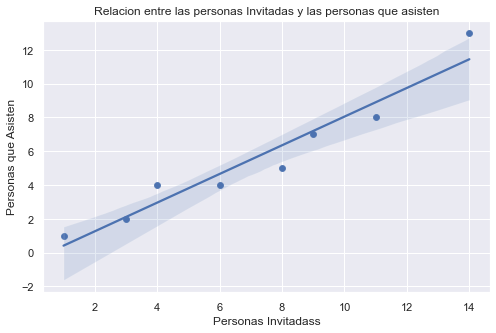

In [64]:
# Your code here.
fig = plt.gcf()
fig.set_size_inches(8, 5)

sns.scatterplot(data = invited_attended, x = "invited", y = "attended")
sns.regplot(x="invited", y="attended", data=invited_attended)

plt.title('Relacion entre las personas Invitadas y las personas que asisten', fontsize=12)
plt.xlabel('Personas Invitadass', fontsize=12);
plt.ylabel('Personas que Asisten', fontsize=12);

plt.show();

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [2]:
# Your response here. 
"""En la grafica se aprecia una relacion positiva entre las variables, es decir, a mayor cantidad de personas invitadas
mayor numeros de personas asistiran a la invitacion"""

In [65]:
invited_attended.describe()

,invited,attended
count,8.000000,8.000000
mean,7.000000,5.500000
std,4.342481,3.817254
min,1.000000,1.000000
25%,3.750000,3.500000
50%,7.000000,4.500000
75%,9.500000,7.250000
max,14.000000,13.000000


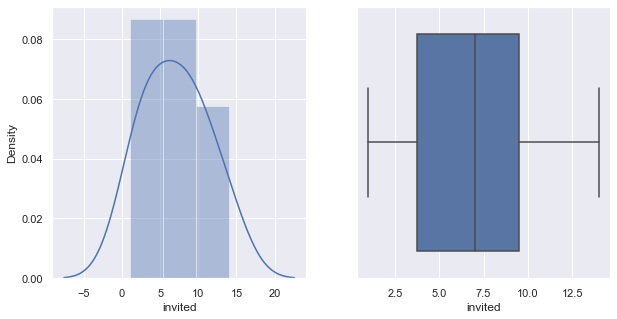

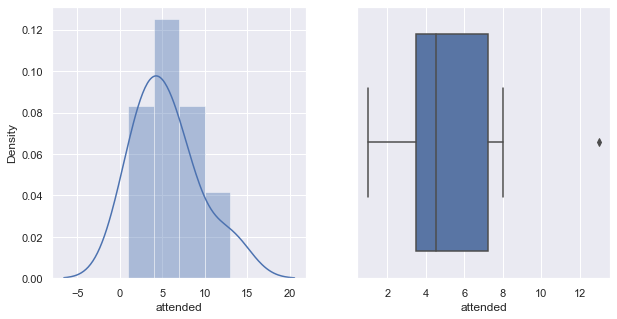

In [66]:
for columna in invited_attended:
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    sns.distplot(invited_attended[columna], kde=True, ax=ax[0])
    sns.boxplot(invited_attended[columna], orient='h', ax=ax[1]);

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [67]:
# Your response here. 
print(np.where(invited_attended['attended']>12))
#Se observa un dato atipico en la variable attended que se aleja bastante de la media

(array([7], dtype=int64),)


In [68]:
#find Q1, Q3, and interquartile range for each column
Q1 = invited_attended.quantile(q=.25)
Q3 = invited_attended.quantile(q=.75)
IQR = invited_attended.apply(stats.iqr)

#only keep rows in dataframe that have values within 1.5*IQR of Q1 and Q3
data_clean = invited_attended[~((invited_attended < (Q1-1.5*IQR)) | (invited_attended > (Q3+1.5*IQR))).any(axis=1)]

#find how many rows are left in the dataframe 
data_clean.shape

#eliminamos la fila que contiene el outlier con el metodo interquartile

(7, 2)

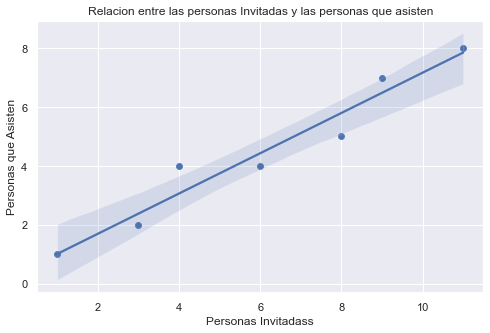

In [70]:
fig = plt.gcf()
fig.set_size_inches(8, 5)

sns.scatterplot(data = data_clean, x = "invited", y = "attended")
sns.regplot(x="invited", y="attended", data=data_clean)

plt.title('Relacion entre las personas Invitadas y las personas que asisten', fontsize=12)
plt.xlabel('Personas Invitadass', fontsize=12);
plt.ylabel('Personas que Asisten', fontsize=12);

plt.show();

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
# Your response here. 
#La linea de regresion se acomoda mejor a los puntos de la grafica de dispersion de los datos